In [1]:
import pandas as pd
df = pd.read_csv('/content/merged_file.csv')

In [2]:
df.head()

,Season,Athlete,Date,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,BLK,STL,TO,PF,Game.Score,Win,RSI,Peak.Power,Peak.Power.BM,Jump.Height
0,2,Athlete 1 Bergdorf,09-06-2021,51.0,129.0,73.0,100.0,9.81,9.05,9.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Athlete 10 McCray,09-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Athlete 11 Owusu-Mensah,09-06-2021,65.0,120.0,71.0,94.0,8.62,7.82,8.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Athlete 12 Porter,09-06-2021,52.0,107.0,83.0,85.0,8.14,7.22,8.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Athlete 13 Smith,09-06-2021,53.0,51.0,76.0,76.0,8.86,6.99,9.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
important_features = ['RHR','HRV','Recovery','Sleep.Score','Hours.in.Bed','Hours.of.Sleep','Sleep.Need','Sleep.Efficiency....','Wake.Periods','Latency..min.','Cycles','REM.Sleep..hours.','Deep.Sleep..hours.','Light.Sleep..hours.','Awake..hours.','Sleep.Debt..hours.','Sleep.Consistency','Respiratory.Rate','Total.Cycle.Sleep.Time..hours.','Restorative.Sleep..hours.','PPC','MPC','EB','OR','MS','LA','NES','OS']

In [4]:
df_important = df[important_features]

In [5]:
df_important.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Latency..min.,...,Total.Cycle.Sleep.Time..hours.,Restorative.Sleep..hours.,PPC,MPC,EB,OR,MS,LA,NES,OS
0,51.0,129.0,73.0,100.0,9.81,9.05,9.06,92.0,12.0,1.94,...,9.05,3.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65.0,120.0,71.0,94.0,8.62,7.82,8.32,91.0,16.0,0.00,...,7.82,3.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52.0,107.0,83.0,85.0,8.14,7.22,8.46,89.0,11.0,13.52,...,8.05,4.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,51.0,76.0,76.0,8.86,6.99,9.25,79.0,27.0,3.35,...,6.99,4.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


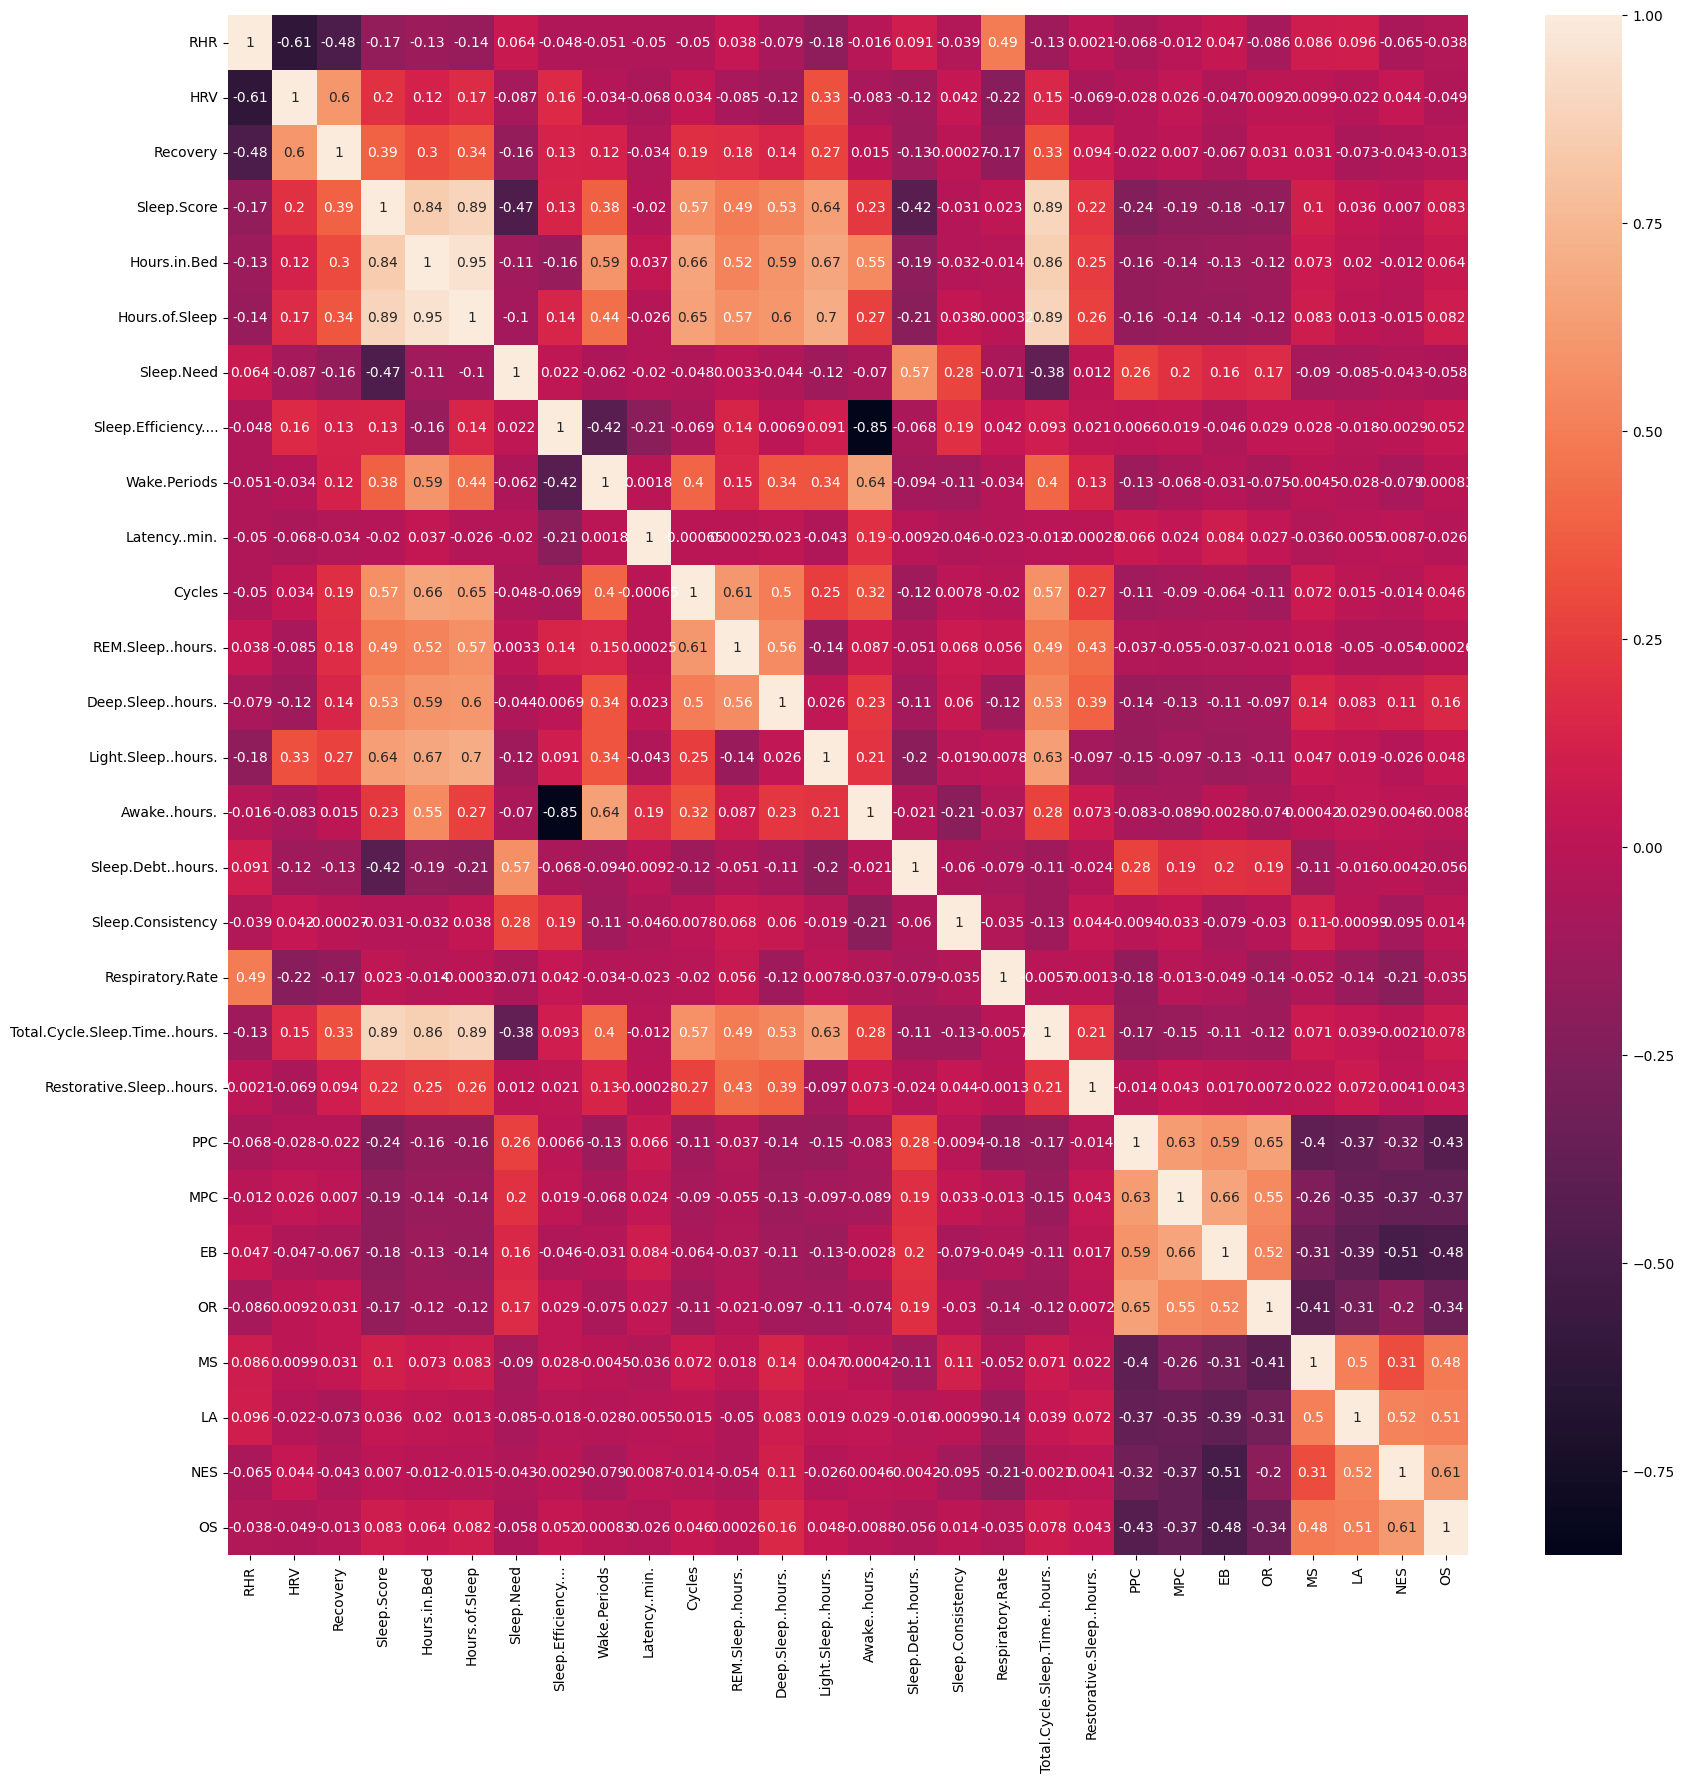

In [6]:
#make a head map for the corr of the important features
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_important.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()


In [7]:
df_important.shape

(4943, 28)

In [8]:
df_important['RSI'] = df['RSI']
df_important.shape

<ipython-input-8-06acc2e087a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important['RSI'] = df['RSI']


(4943, 29)

In [9]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)
data_imputed = imputer.fit_transform(df_important)

# Convert the imputed data back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=df_important.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [10]:
data_imputed_df.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Latency..min.,...,Restorative.Sleep..hours.,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI
0,51.0,129.0,73.0,100.0,9.810,9.050,9.060,92.0,12.0,1.94,...,3.660,2.8,3.5,2.7,2.7,4.1,4.2,4.9,4.1,0.420
1,55.0,62.9,63.9,78.3,8.141,7.232,9.432,88.9,20.0,0.00,...,4.103,3.0,3.0,2.9,3.3,2.8,2.4,2.9,3.0,0.581
2,65.0,120.0,71.0,94.0,8.620,7.820,8.320,91.0,16.0,0.00,...,3.240,3.3,3.4,2.5,3.1,3.1,2.5,3.4,3.0,0.351
3,52.0,107.0,83.0,85.0,8.140,7.220,8.460,89.0,11.0,13.52,...,4.100,3.6,4.8,3.7,3.4,3.2,2.8,2.5,2.4,0.473
4,53.0,51.0,76.0,76.0,8.860,6.990,9.250,79.0,27.0,3.35,...,4.010,2.9,3.0,2.8,3.3,2.7,2.8,3.4,3.3,0.540


In [23]:
data_imputed_df.to_csv('data_fully_imputed.csv', index=False)

In [24]:
# #checking if RSI is more than 1.0 while imputing
# count = 0
# for i in range(len(data_imputed_df['RSI'])):
#   if data_imputed_df['RSI'][i]>1.0:
#     # data_imputed_df['RSI'][i] = data_imputed_df['RSI'][i]/10
#     count += 1
# print(count)

0


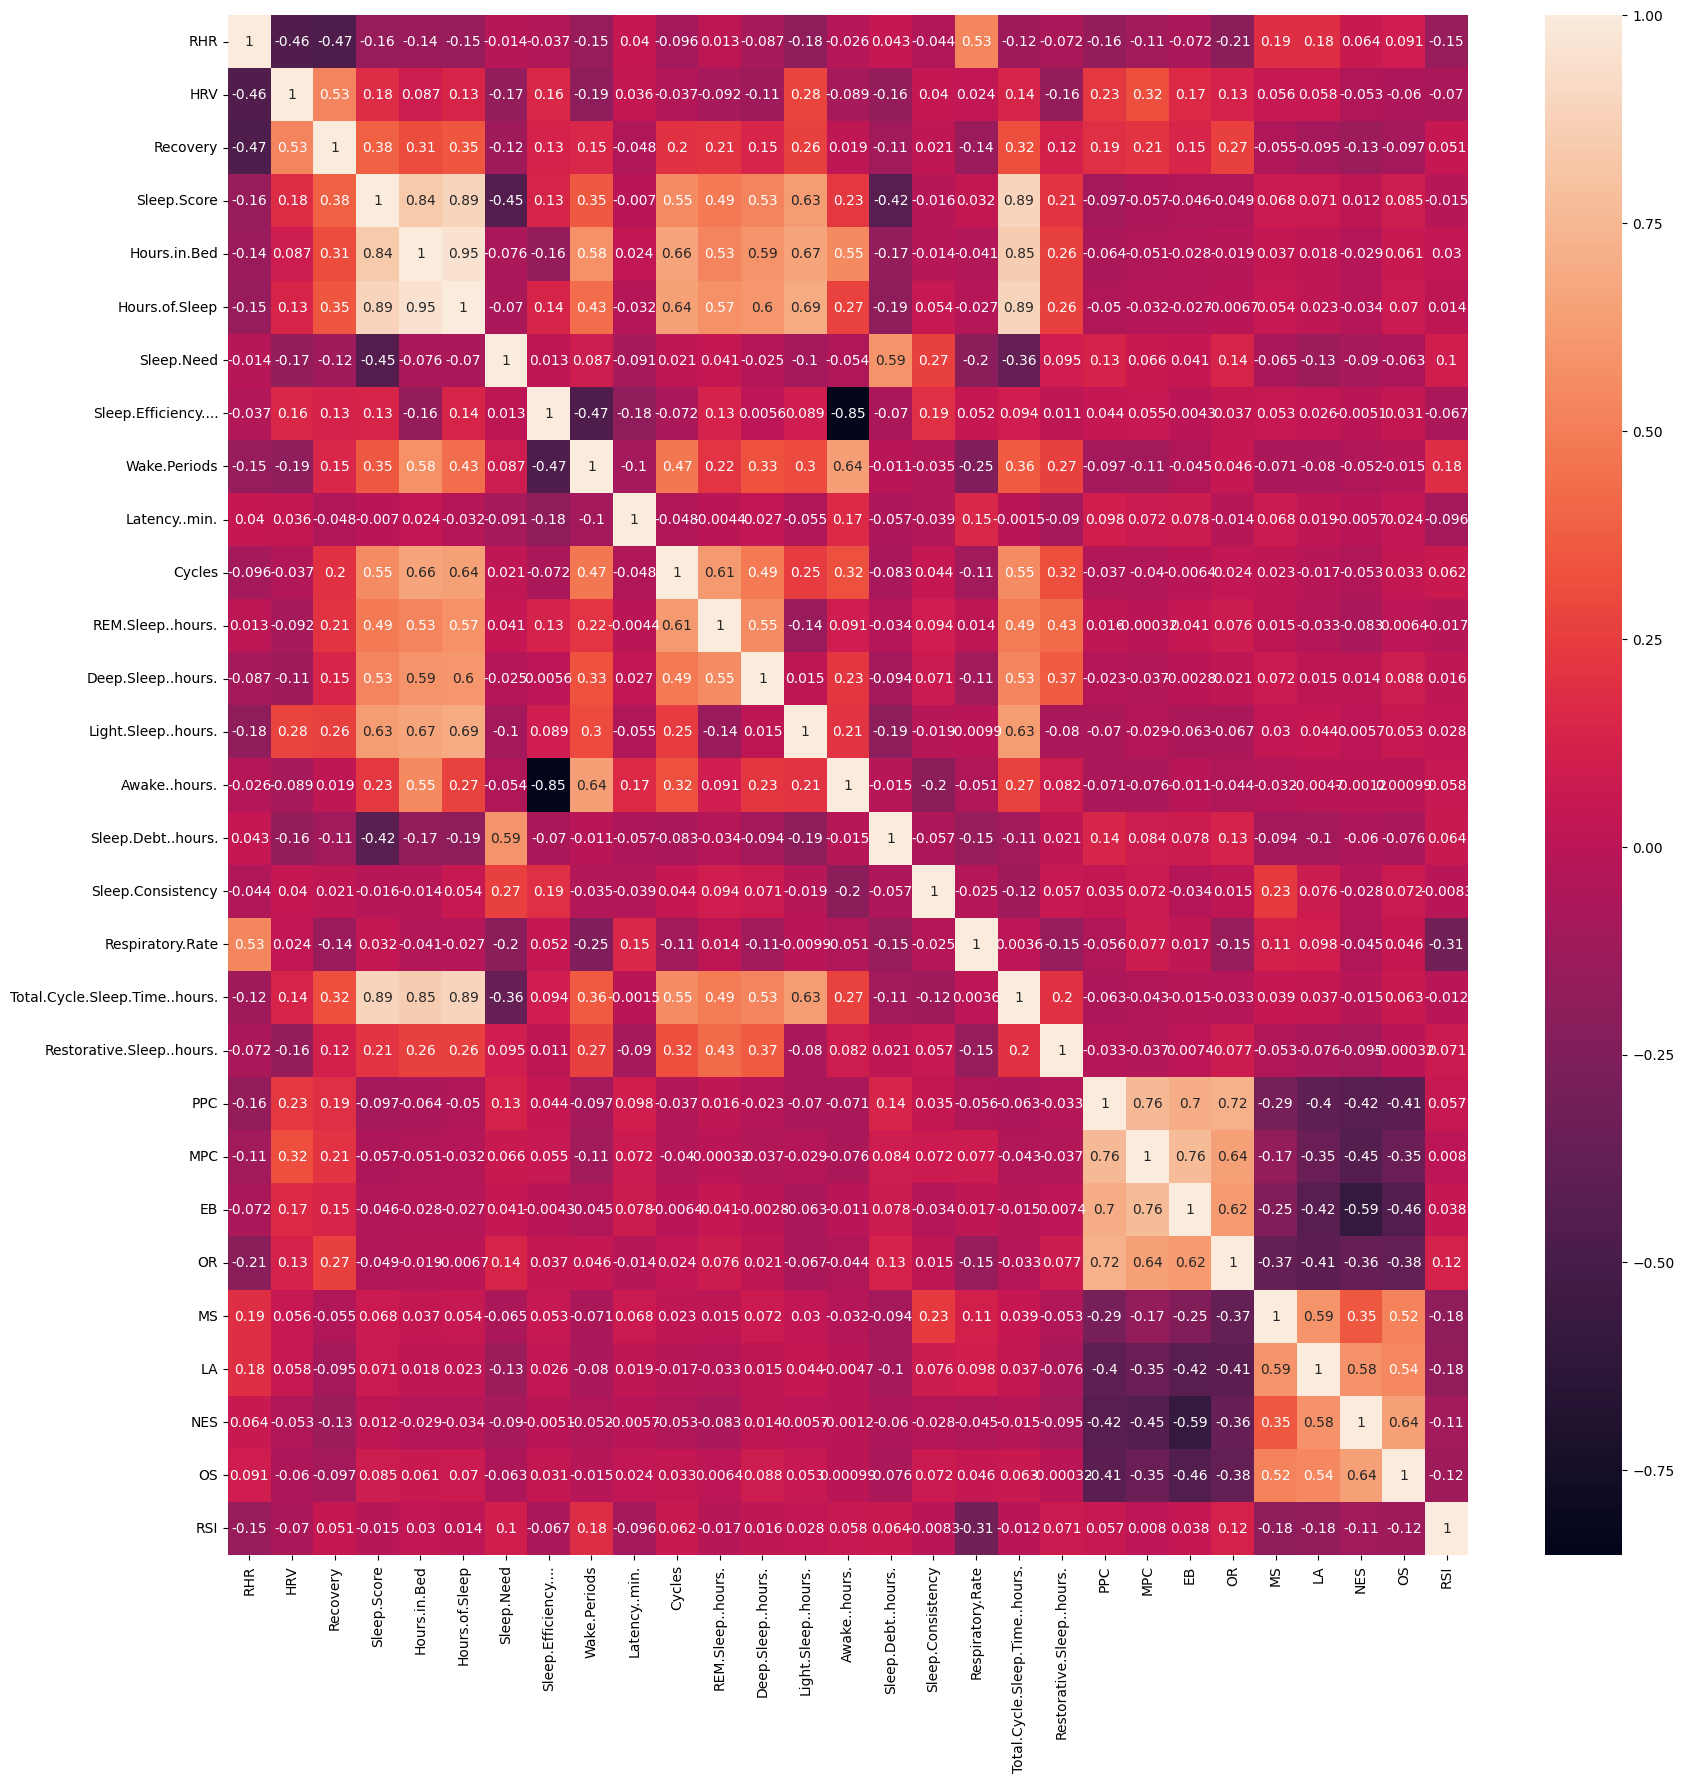

In [12]:
#make a head map for the corr of the important features
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_imputed_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()


#feature importance

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming dara_imputed_df is your DataFrame and 'RSI' is your target column
# Replace 'dara_imputed_df' and 'RSI' with your actual DataFrame and target column name

# Define the features (X) and target (y)
X = data_imputed_df.drop('RSI', axis=1)
y = data_imputed_df['RSI']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

# Fit the model to the scaled features
rf.fit(X_scaled_df, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with features and their importances
feature_importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df_sorted)


                           Feature  Importance
17                Respiratory.Rate    0.687574
1                              HRV    0.145295
9                    Latency..min.    0.032169
6                       Sleep.Need    0.018268
11               REM.Sleep..hours.    0.012513
21                             MPC    0.010231
4                     Hours.in.Bed    0.008551
14                   Awake..hours.    0.007283
19       Restorative.Sleep..hours.    0.007153
0                              RHR    0.006974
2                         Recovery    0.006526
13             Light.Sleep..hours.    0.005869
24                              MS    0.005625
12              Deep.Sleep..hours.    0.005223
26                             NES    0.004174
27                              OS    0.004161
5                   Hours.of.Sleep    0.004013
20                             PPC    0.003442
25                              LA    0.003301
8                     Wake.Periods    0.002725
18  Total.Cyc

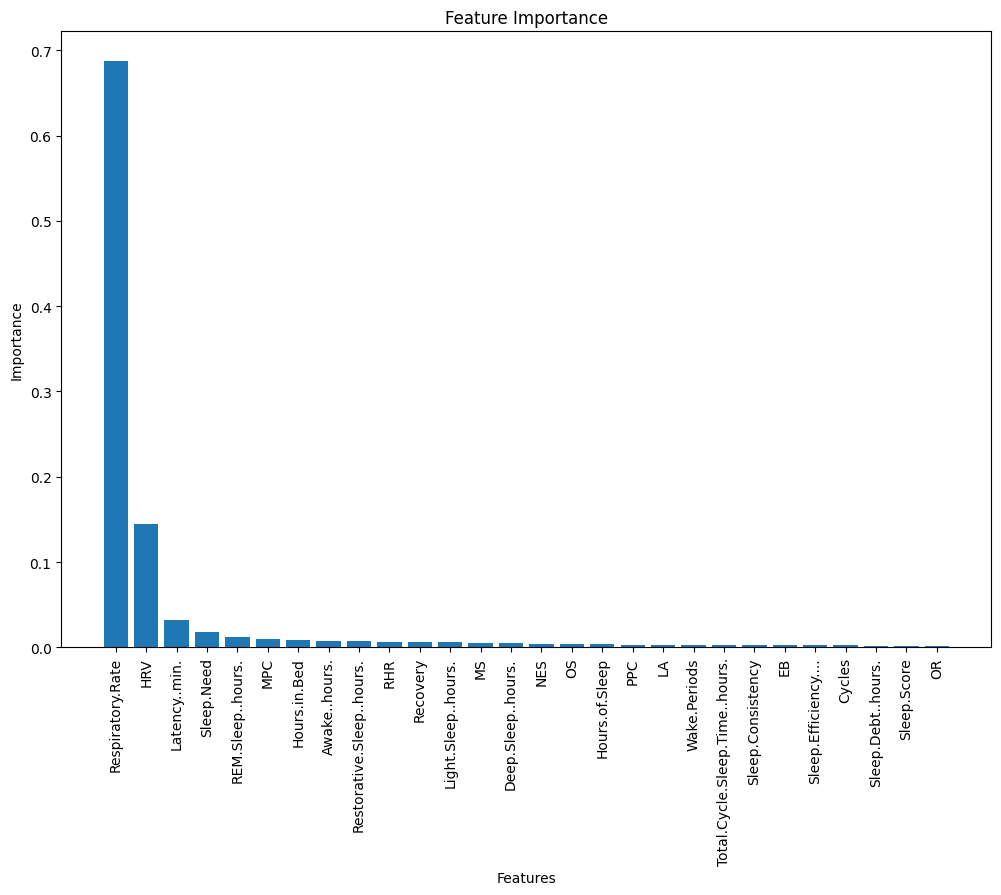

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df_sorted['Feature'], feature_importance_df_sorted['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()


#creating quantiles for RSI mapping

In [29]:
vals = np.quantile(data_imputed_df['RSI'], [0,0.25,0.5,0.75,1])
vals

array([0.1364, 0.368 , 0.427 , 0.581 , 0.86  ])

In [32]:
# Create the 'RSI_cat' column based on the quantile ranges
data_imputed_df['RSI_cat'] = pd.qcut(data_imputed_df['RSI'], q=4, labels=[0, 1, 2, 3])

# Print the DataFrame to see the new 'RSI_cat' column
data_imputed_df.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Latency..min.,...,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI,RSI_cat
0,51.0,129.0,73.0,100.0,9.810,9.050,9.060,92.0,12.0,1.94,...,2.8,3.5,2.7,2.7,4.1,4.2,4.9,4.1,0.420,1
1,55.0,62.9,63.9,78.3,8.141,7.232,9.432,88.9,20.0,0.00,...,3.0,3.0,2.9,3.3,2.8,2.4,2.9,3.0,0.581,2
2,65.0,120.0,71.0,94.0,8.620,7.820,8.320,91.0,16.0,0.00,...,3.3,3.4,2.5,3.1,3.1,2.5,3.4,3.0,0.351,0
3,52.0,107.0,83.0,85.0,8.140,7.220,8.460,89.0,11.0,13.52,...,3.6,4.8,3.7,3.4,3.2,2.8,2.5,2.4,0.473,2
4,53.0,51.0,76.0,76.0,8.860,6.990,9.250,79.0,27.0,3.35,...,2.9,3.0,2.8,3.3,2.7,2.8,3.4,3.3,0.540,2


# Overcoming Minority Sampling


In [67]:
data_copy = data_imputed_df.copy()
data_copy.columns

Index(['RHR', 'HRV', 'Recovery', 'Sleep.Score', 'Hours.in.Bed',
       'Hours.of.Sleep', 'Sleep.Need', 'Sleep.Efficiency....', 'Wake.Periods',
       'Latency..min.', 'Cycles', 'REM.Sleep..hours.', 'Deep.Sleep..hours.',
       'Light.Sleep..hours.', 'Awake..hours.', 'Sleep.Debt..hours.',
       'Sleep.Consistency', 'Respiratory.Rate',
       'Total.Cycle.Sleep.Time..hours.', 'Restorative.Sleep..hours.', 'PPC',
       'MPC', 'EB', 'OR', 'MS', 'LA', 'NES', 'OS', 'RSI', 'RSI_cat'],
      dtype='object')

In [68]:
data_copy = data_copy.drop('RSI', axis=1)
data_copy.shape

(4943, 29)

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN


X = data_copy.drop('RSI_cat', axis=1)
y = data_copy['RSI_cat']

# Initialize SMOTE
smote_enn = SMOTEENN(random_state=42)

# Fit SMOTE on the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_resampled.shape

(6530, 28)

In [84]:
from imblearn.combine import SMOTETomek

smote_tomek= SMOTETomek()
X_resampled, y_resampled = smote_tomek.fit_resample(X_resampled, y_resampled)
X_resampled.shape

(8896, 28)

In [85]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Fitting it to an XGBClassifier

Accuracy: 0.9747191011235955
Confusion Matrix:
[[449   9   0   0]
 [ 11 424   0   0]
 [  1  14 422   8]
 [  0   2   0 440]]


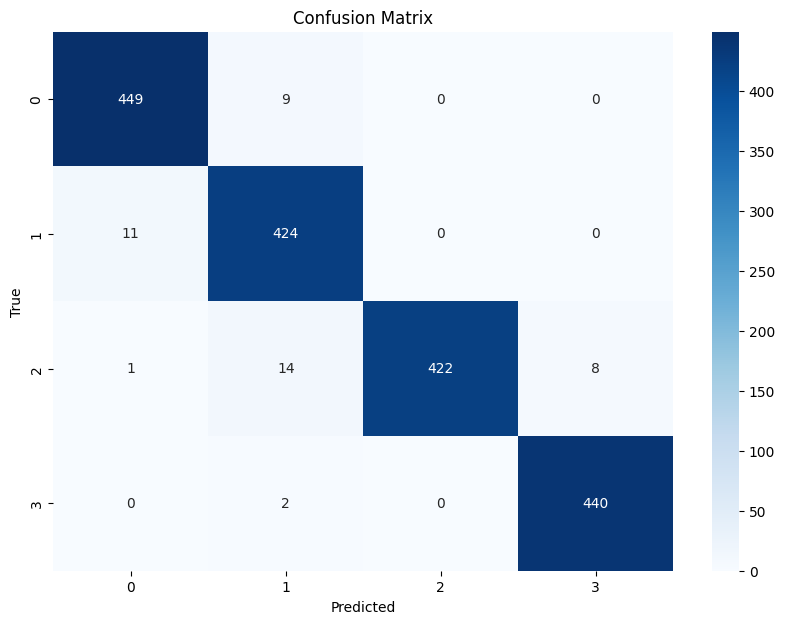

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       458
           1       0.94      0.97      0.96       435
           2       1.00      0.95      0.97       445
           3       0.98      1.00      0.99       442

    accuracy                           0.97      1780
   macro avg       0.98      0.97      0.97      1780
weighted avg       0.98      0.97      0.97      1780



In [86]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier
xgb_clf = XGBClassifier()

# Fit the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


# **Predicting forecast for the next week!**


##Importing the new data file

In [6]:
import pandas as pd
df = pd.read_csv('/content/weekly_averages_nextRSI.csv')
df.head()

,Athlete,Week,Season,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,PPC,MPC,EB,OR,MS,LA,NES,OS,RSI,next_week_RSI
0,Athlete 1 Bergdorf,2021-09-06/2021-09-12,2,47.714286,136.285714,74.714286,74.571429,6.847143,6.462857,8.711429,...,3.600000,3.628571,2.985714,3.114286,3.542857,3.385714,4.014286,3.600000,0.336429,NaN
1,Athlete 1 Bergdorf,2021-09-13/2021-09-19,2,50.285714,120.571429,61.428571,69.142857,6.685714,5.948571,8.577143,...,4.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,0.386429,0.336429
2,Athlete 1 Bergdorf,2021-09-20/2021-09-26,2,49.857143,108.142857,56.571429,69.571429,6.928571,6.371429,9.195714,...,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,0.369143,0.386429
3,Athlete 1 Bergdorf,2021-09-27/2021-10-03,2,46.000000,136.285714,78.142857,91.428571,8.270000,7.457143,8.135714,...,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.327714,0.369143
4,Athlete 1 Bergdorf,2021-10-04/2021-10-10,2,46.285714,115.142857,57.428571,86.142857,8.124286,7.341429,8.378571,...,3.585714,3.614286,3.200000,3.057143,3.571429,3.471429,3.628571,3.971429,0.335143,0.327714


In [7]:
df.drop(['Athlete','Week','Season','RSI'],axis=1,inplace=True)

In [8]:
df.shape

(837, 29)

In [9]:
df = df.dropna(subset=['next_week_RSI'])
df.shape

(815, 29)

## breaking the RSI into 4 quantiles


In [11]:
# vals = np.quantile(df['next_week_RSI'], [0,0.25,0.5,0.75,1])
# vals

In [12]:
# Create the 'RSI_cat' column based on the quantile ranges
df['RSI_cat'] = pd.qcut(df['next_week_RSI'], q=4, labels=[0, 1, 2, 3])
df.head()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Latency..min.,...,PPC,MPC,EB,OR,MS,LA,NES,OS,next_week_RSI,RSI_cat
1,50.285714,120.571429,61.428571,69.142857,6.685714,5.948571,8.577143,90.000000,6.157143,0.957143,...,4.000000,3.000000,4.0,5.000000,3.000000,3.000000,3.000000,3.000000,0.336429,0
2,49.857143,108.142857,56.571429,69.571429,6.928571,6.371429,9.195714,91.571429,7.242857,6.604286,...,5.000000,4.000000,3.0,4.000000,4.000000,4.000000,5.000000,4.000000,0.386429,1
3,46.000000,136.285714,78.142857,91.428571,8.270000,7.457143,8.135714,90.714286,10.771429,1.025714,...,4.000000,5.000000,4.0,4.000000,3.000000,4.000000,4.000000,4.000000,0.369143,0
4,46.285714,115.142857,57.428571,86.142857,8.124286,7.341429,8.378571,90.571429,13.142857,4.264286,...,3.585714,3.614286,3.2,3.057143,3.571429,3.471429,3.628571,3.971429,0.327714,0
5,45.285714,128.000000,70.428571,67.714286,7.492857,6.504286,9.584286,87.142857,7.385714,3.368571,...,4.000000,4.000000,4.0,4.000000,5.000000,3.000000,5.000000,4.000000,0.335143,0


## Overcoming Minority Sampling

In [13]:
df_copy = df.copy()
df_copy.columns

Index(['RHR', 'HRV', 'Recovery', 'Sleep.Score', 'Hours.in.Bed',
       'Hours.of.Sleep', 'Sleep.Need', 'Sleep.Efficiency....', 'Wake.Periods',
       'Latency..min.', 'Cycles', 'REM.Sleep..hours.', 'Deep.Sleep..hours.',
       'Light.Sleep..hours.', 'Awake..hours.', 'Sleep.Debt..hours.',
       'Sleep.Consistency', 'Respiratory.Rate',
       'Total.Cycle.Sleep.Time..hours.', 'Restorative.Sleep..hours.', 'PPC',
       'MPC', 'EB', 'OR', 'MS', 'LA', 'NES', 'OS', 'next_week_RSI', 'RSI_cat'],
      dtype='object')

In [14]:
df_copy = df_copy.drop('next_week_RSI', axis=1)
df_copy.shape

(815, 29)

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN


X = df_copy.drop('RSI_cat', axis=1)
y = df_copy['RSI_cat']

# Initialize SMOTE
smote_enn = SMOTEENN(random_state=42)

# Fit SMOTE on the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_resampled.shape

(45, 28)

In [16]:
from imblearn.combine import SMOTETomek

smote_tomek= SMOTETomek()
X_resampled, y_resampled = smote_tomek.fit_resample(X_resampled, y_resampled)
X_resampled.shape

(88, 28)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

## Predicting using XGB classifier

Accuracy: 0.8333333333333334
Confusion Matrix:
[[4 0 0 0]
 [0 4 1 0]
 [0 0 3 0]
 [0 0 2 4]]


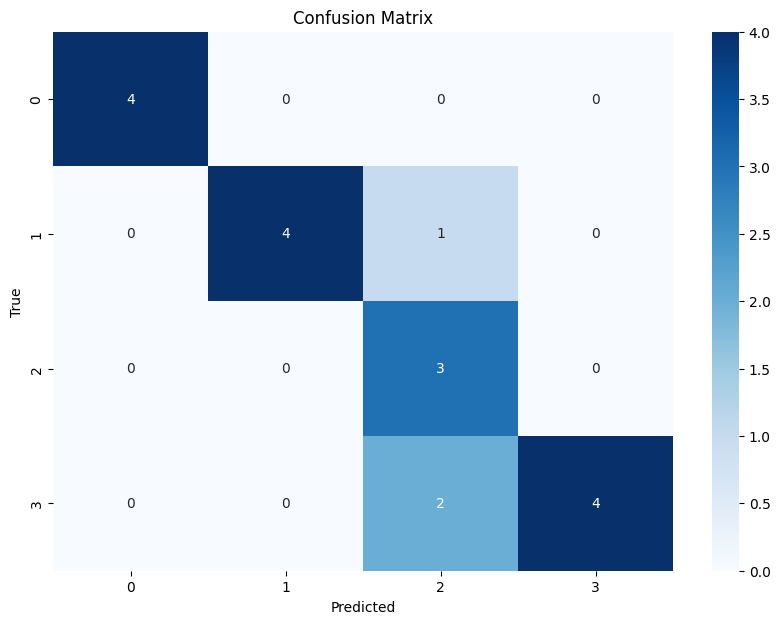

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.50      1.00      0.67         3
           3       1.00      0.67      0.80         6

    accuracy                           0.83        18
   macro avg       0.88      0.87      0.84        18
weighted avg       0.92      0.83      0.85        18



In [18]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier
xgb_clf = XGBClassifier()

# Fit the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


## Model Summarization using SHAP

In [19]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.9 MB/s eta 0:00:00


In [23]:
import shap
shap.initjs()

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

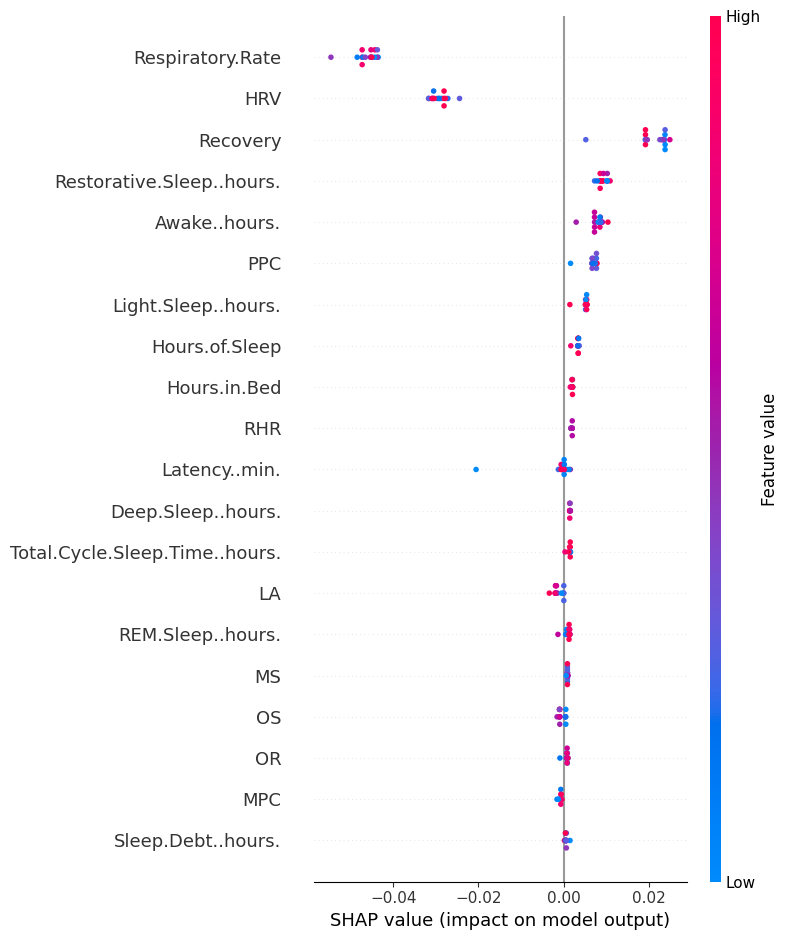

In [250]:
# Summarize the effects of features
shap.summary_plot(shap_values, X_test)

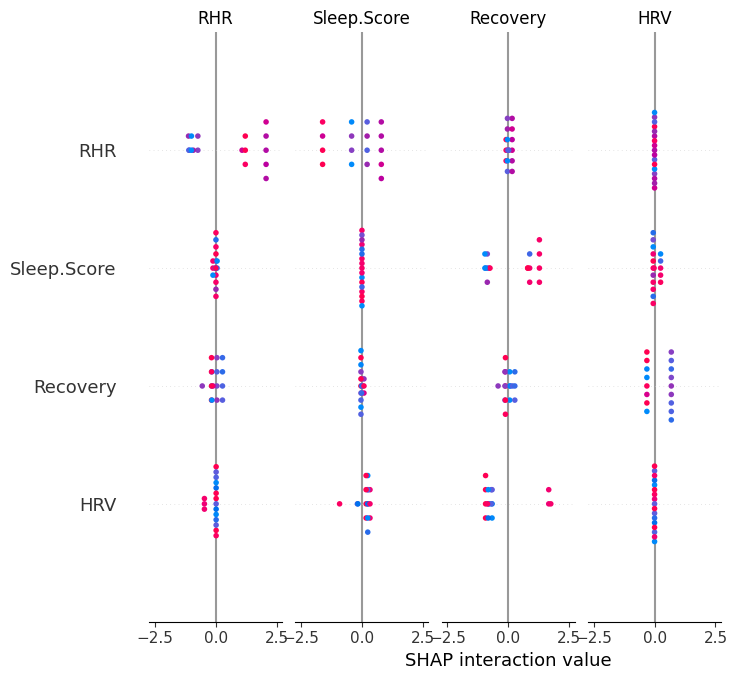

In [242]:
import shap

# Compute SHAP values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

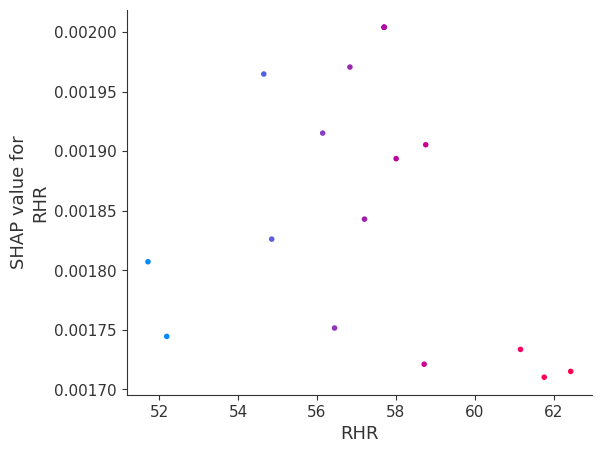

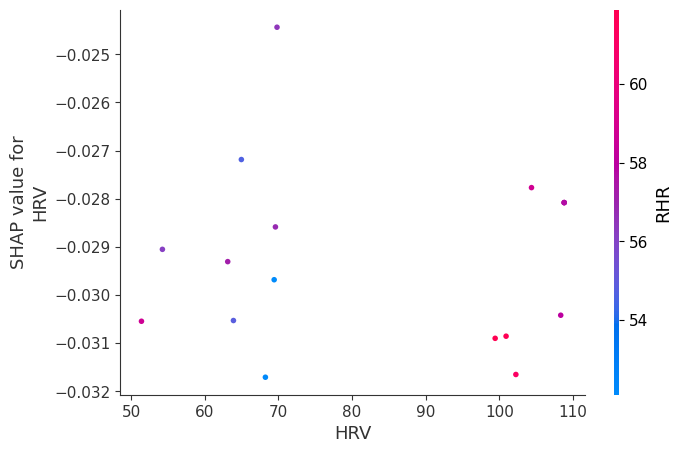

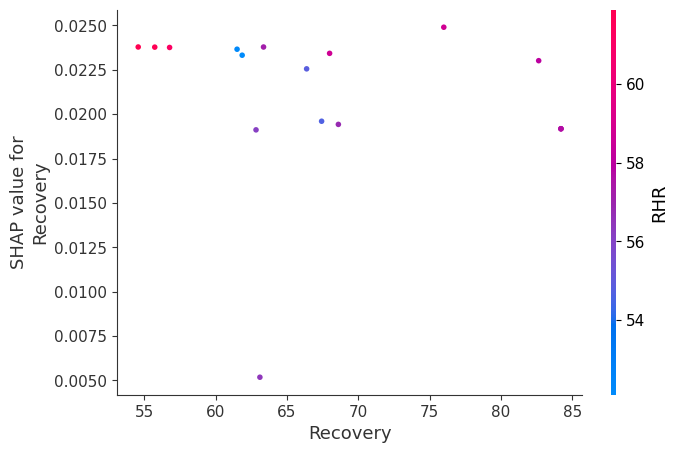

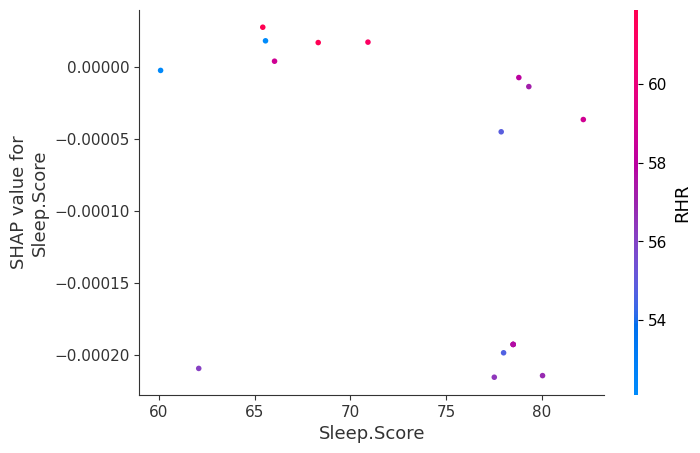

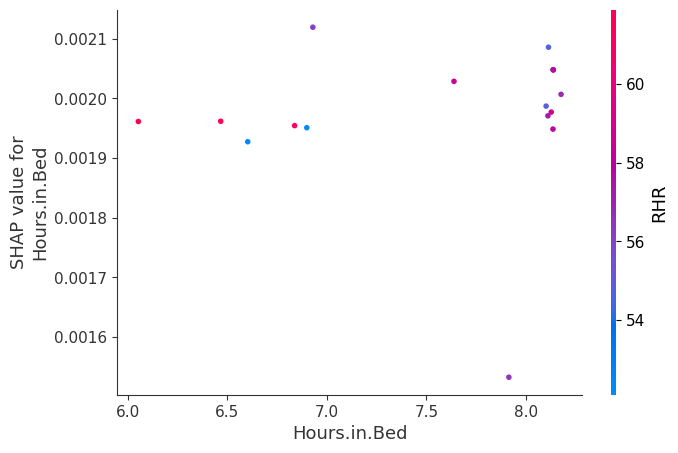

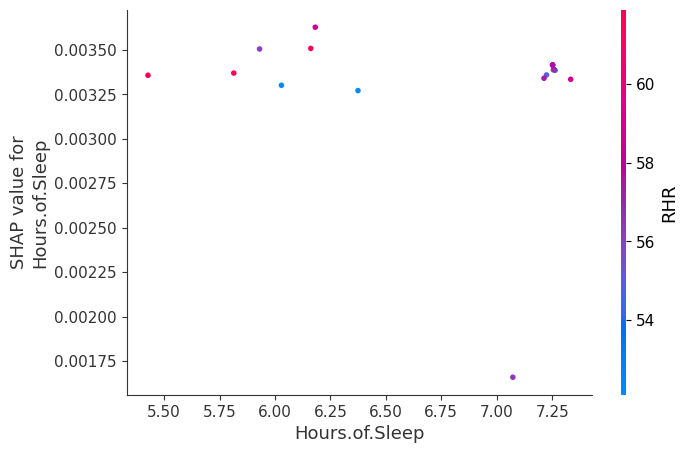

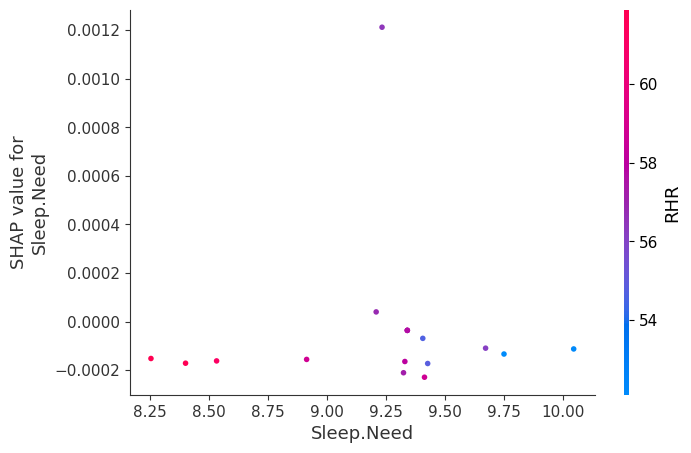

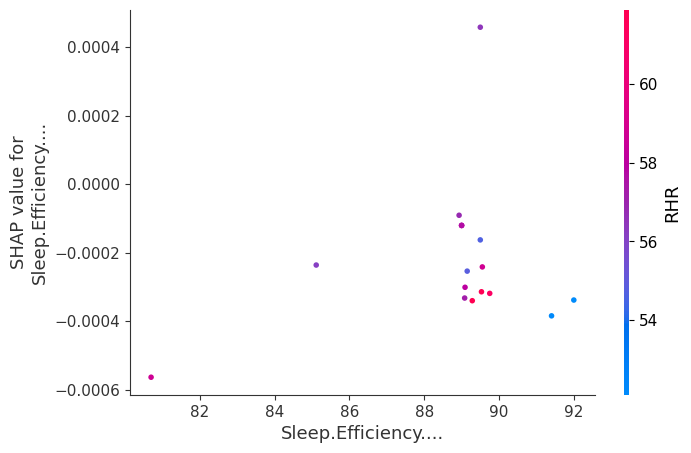

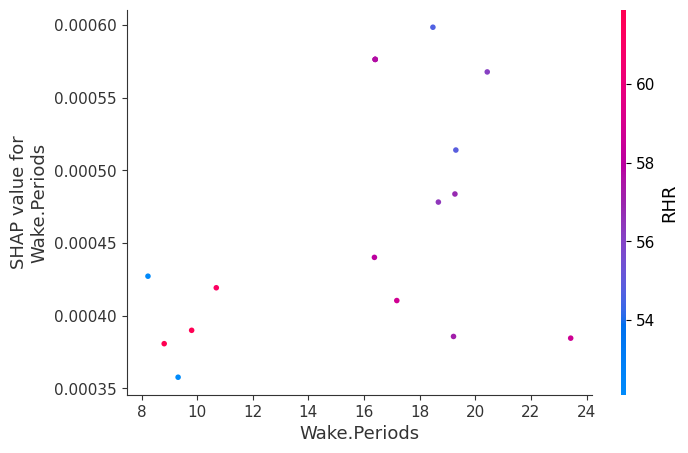

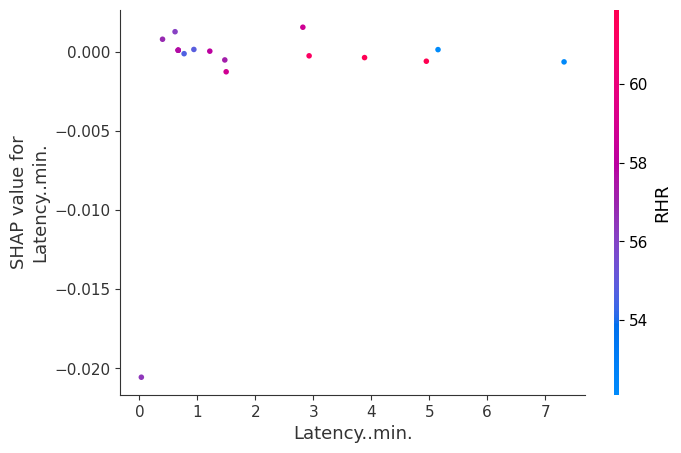

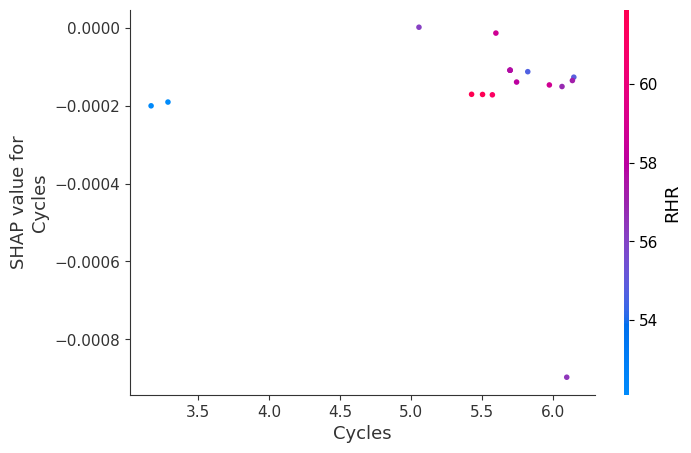

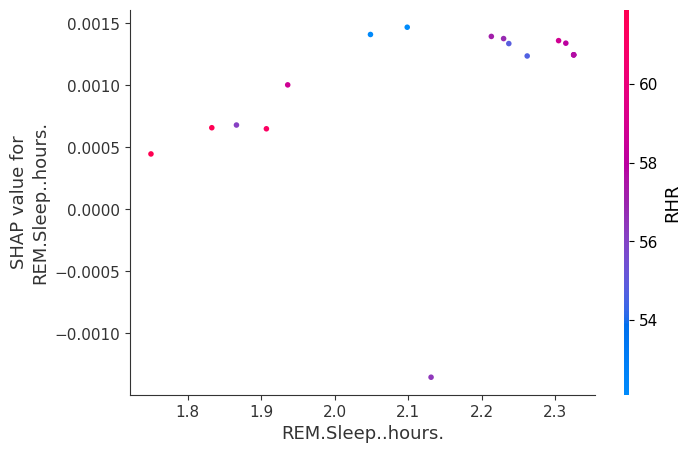

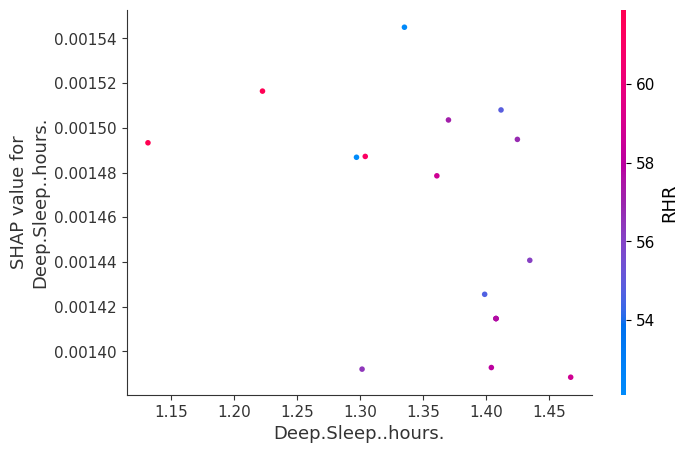

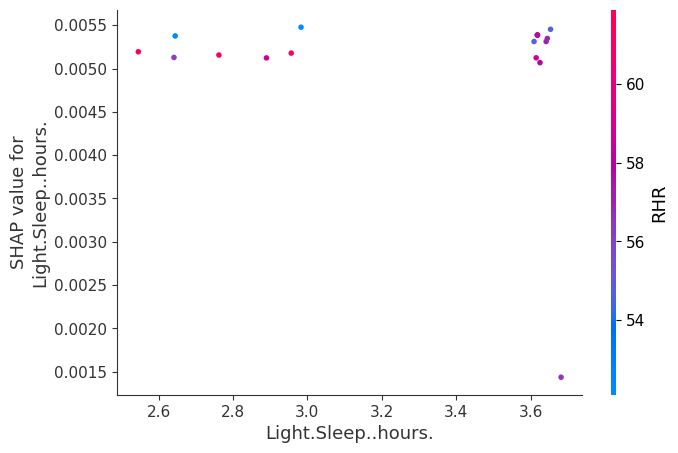

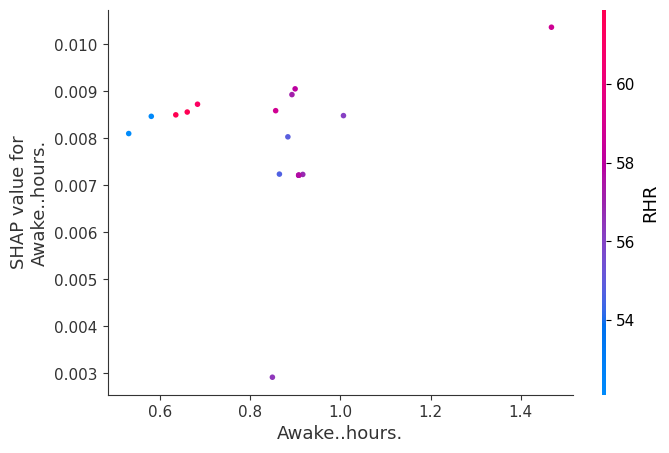

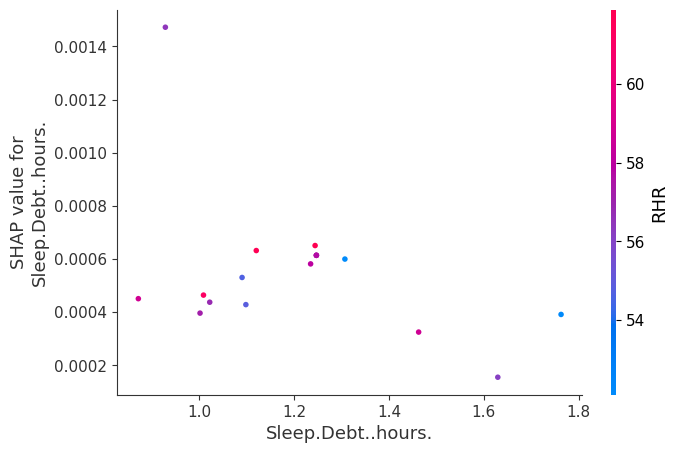

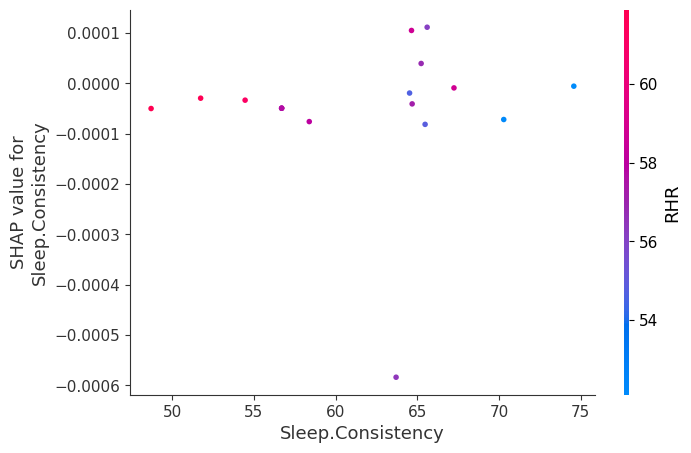

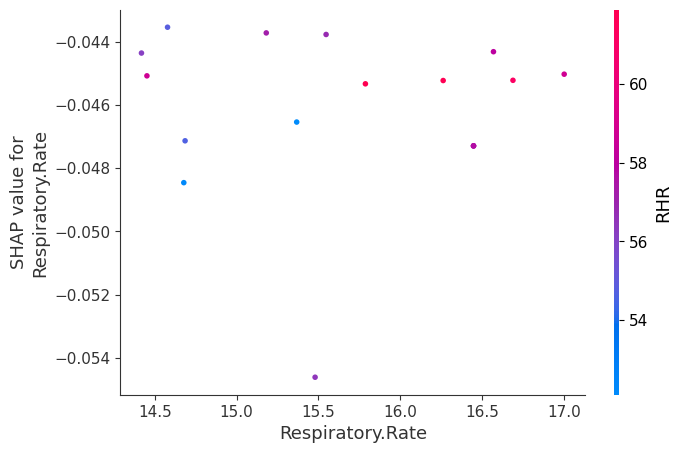

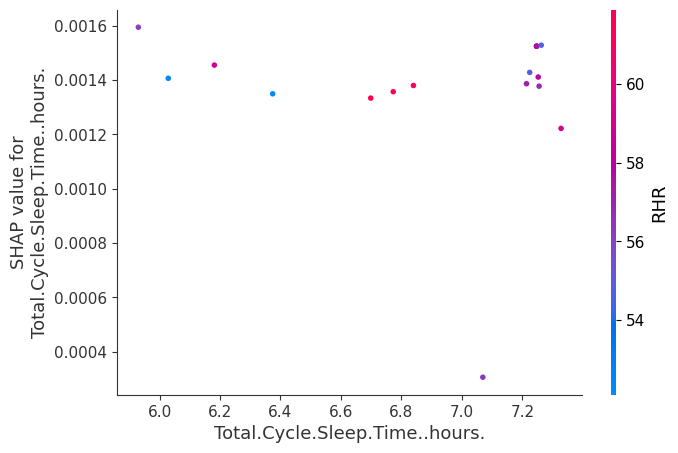

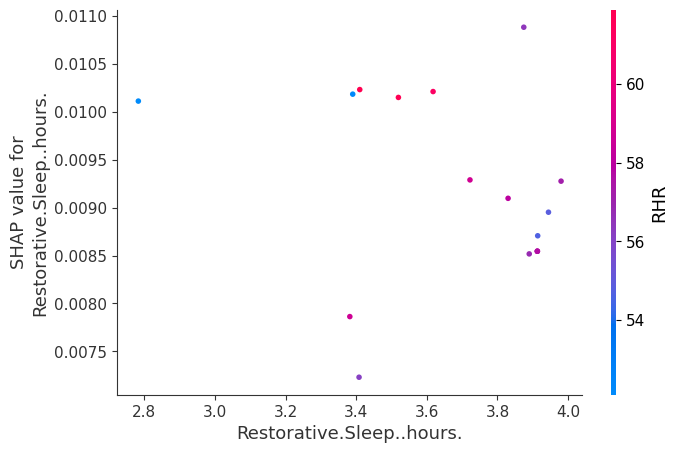

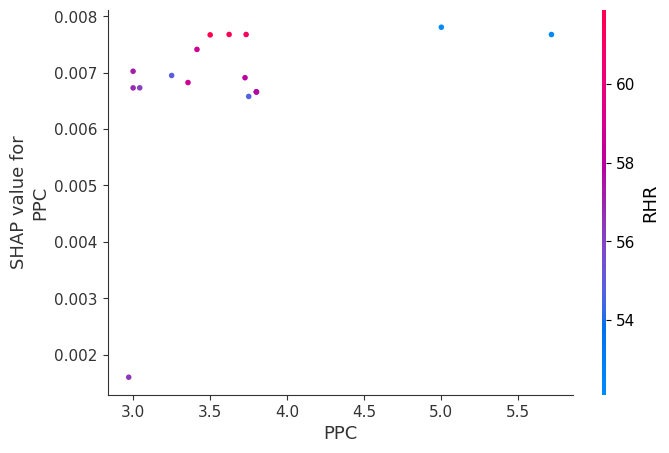

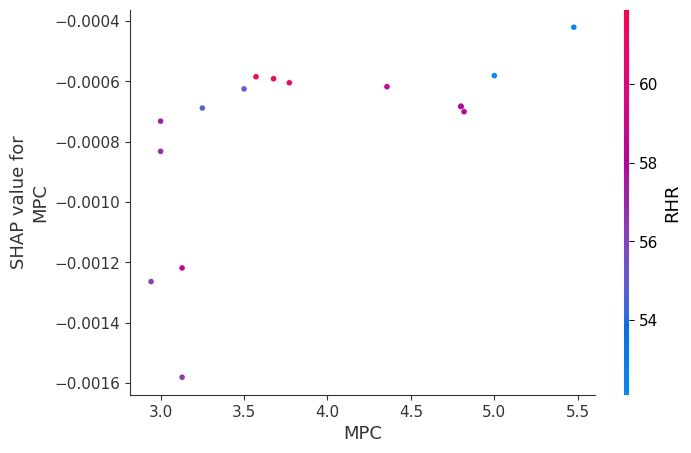

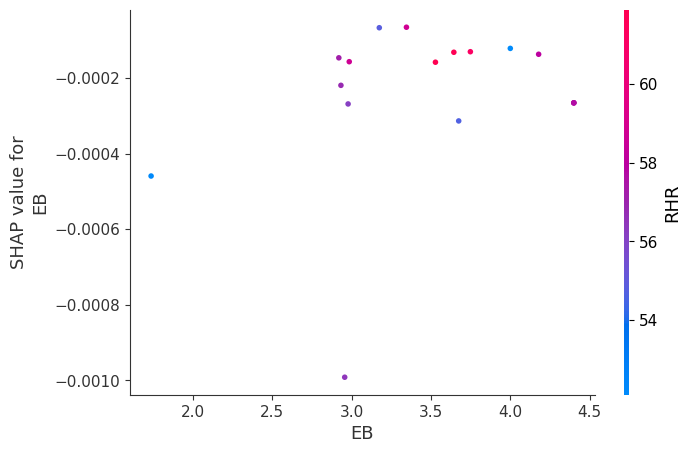

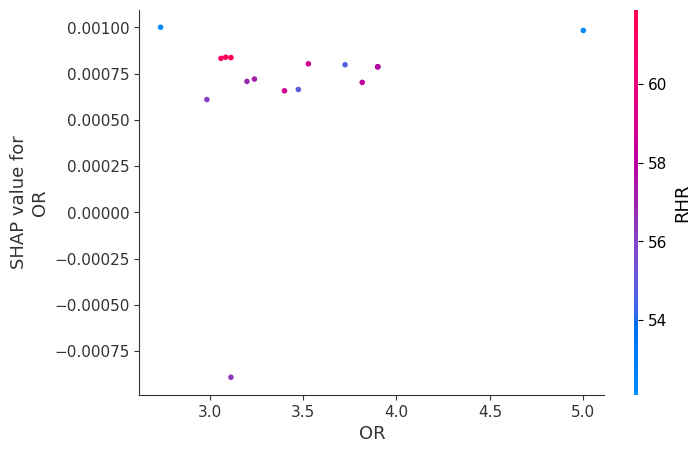

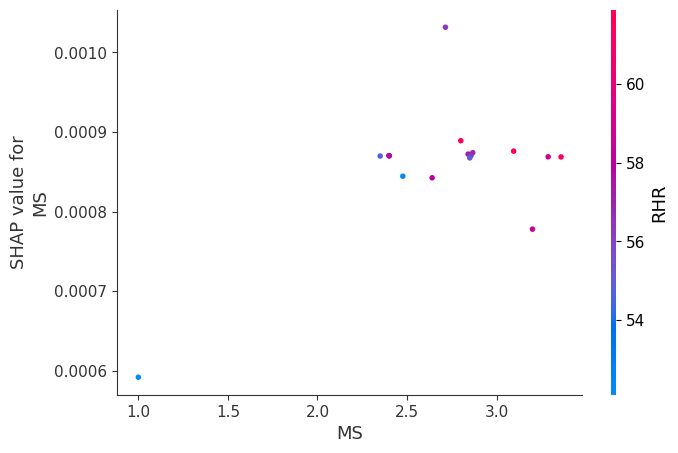

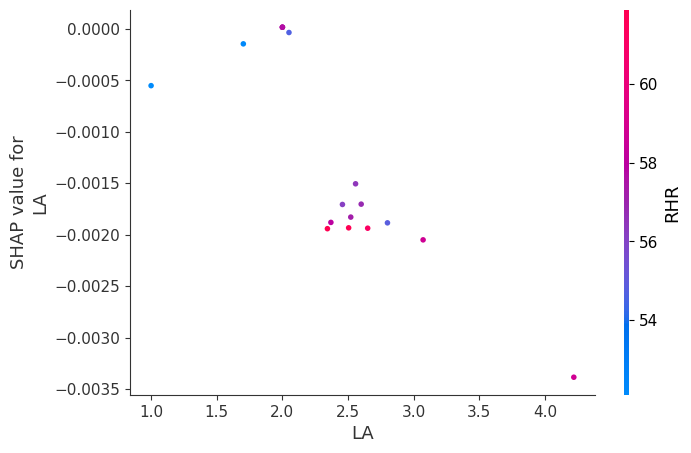

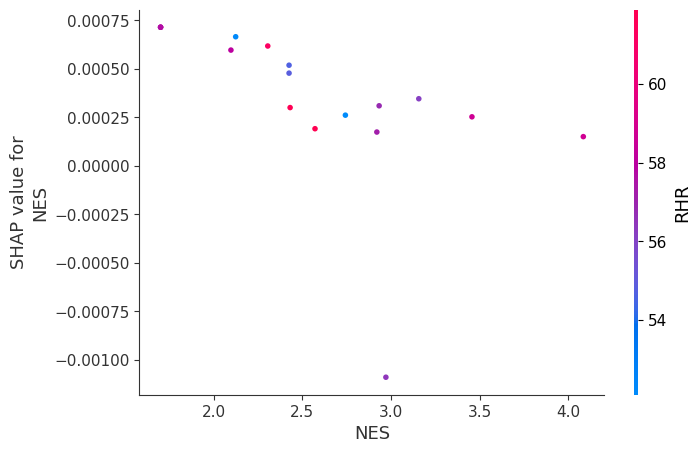

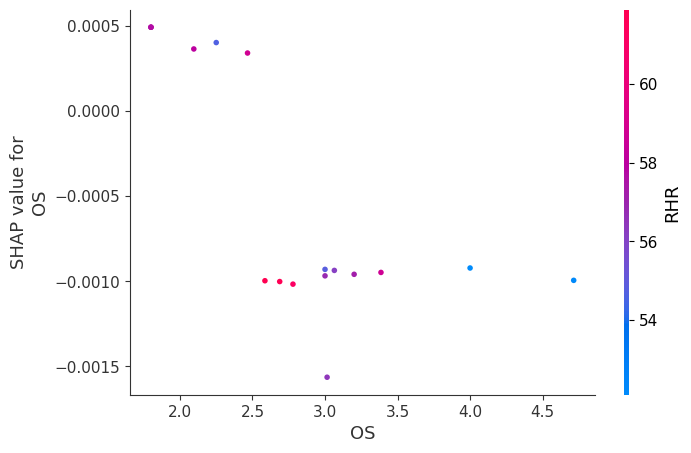

In [256]:
for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values, X_test)